<a href="https://colab.research.google.com/github/FernandaECC/Identificador_de_passaros/blob/main/Audio_Dataset_Experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Trabalho para a disciplina IA940 feito por Fernanda Chaves e Mariane Martins

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import pandas as pd
import os
import scipy.signal
from IPython.display import Audio

In [ ]:
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())


In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
diretorio = '/content/drive/Shared drives/EG940/Sons/sons/'
planilha = 'Sons_mata_atlantica'

# Abrir planilha e validar dados

In [ ]:
wb = gc.open(planilha)
sheet = wb.worksheet('sons').get_all_values()
df = pd.DataFrame(sheet)
df = df.rename(columns=df.iloc[0]).drop(df.index[0:2])

O pandas extrai os dados da planilha do google sheet e transforma em uma estrutura de dados que o python consegue maniupular

In [ ]:
df.head()

,name,filename,description,tags,tipo
2,Mariane,savacu-de-coroa.wav,pássaro cantando em ambiente ruidoso,"grave, longo, canto, ruido",medio
3,Mariane,tucanuçu.wav,pássaro cantando em ambiente ruidoso,"grave, curto, canto, ruido",medio
4,Fernanda,arapaçu-verde.wav,pássaro piando,"agudo, curto, piado",agudo
5,Fernanda,barranqueiro-de-olho-branco.wav,pássaro cantando em ambiente ruidoso,"agudo, curto, ruido, canto",agudo
6,Mariane,tucano-de-bico-verde.wav,pássaro cantando,"grave, longo, canto",medio


In [ ]:
# Checando se arquivos existem, numero de canais e taxa de amostragem
n_files = 0
taxas_de_amostragem = []
duracoes = []
canais = []
classe = []
for index, row in df.iterrows():
  #pegar o caminho do audio e verificar se existe
  full_fname = diretorio + row['filename']
  if (n_files % 10 == 0):
    print(str(n_files+1) + " " + full_fname)
    #se não existe:
  if not os.path.exists(full_fname):
    print(row['filename'] + " (index=" + str(n_files) + ") does not exist!")
  else:
    #abre o arquivo, vê a taxa de amostragem, duração e o tipo
    y, sr = librosa.load(full_fname, sr=None)
    taxas_de_amostragem.append(sr)
    duracoes.append(len(y)/sr)
    classe.append(row['tipo'])
    n_files += 1
print("Encontrei esse numero de arquivos: " + str(n_files))
#adiciona a planilha a taxa de amostragem e a duração dos áudios
df['sr'] = taxas_de_amostragem
df['len'] = duracoes

1 /content/drive/Shared drives/EG940/Sons/sons/savacu-de-coroa.wav
11 /content/drive/Shared drives/EG940/Sons/sons/besourinho-de-bico-vermelho.wav
21 /content/drive/Shared drives/EG940/Sons/sons/bico-virado-miúdo.wav
31 /content/drive/Shared drives/EG940/Sons/sons/fogo-apagou.wav
41 /content/drive/Shared drives/EG940/Sons/sons/saracura-matraca.wav
51 /content/drive/Shared drives/EG940/Sons/sons/andarilho.wav
61 /content/drive/Shared drives/EG940/Sons/sons/coruja-do-mato.wav
71 /content/drive/Shared drives/EG940/Sons/sons/gaturamo-bandeira.wav
81 /content/drive/Shared drives/EG940/Sons/sons/maria-cavaleira.wav
91 /content/drive/Shared drives/EG940/Sons/sons/saracura-do-mato.wav
Encontrei esse numero de arquivos: 100


In [ ]:
agudo = 0
medio = 0


for item in range(100):
  if (classe[item] == 'agudo'):
    agudo = agudo+1

  if (classe[item] == 'medio'):
    medio= medio+1 


print("Agudo:",agudo)   
print("Médio:",medio)

 


Agudo: 51
Médio: 49


In [ ]:
df.to_csv(r'/content/drive/Shareddrives/EG940/saida_planilha.csv', index = False)

extrair planilha. é adicionado na planilha o tempo de duração e a taxa de amostragem, ai da pra descobrir qual está fora do padrão ou da pra printar as novas colunas


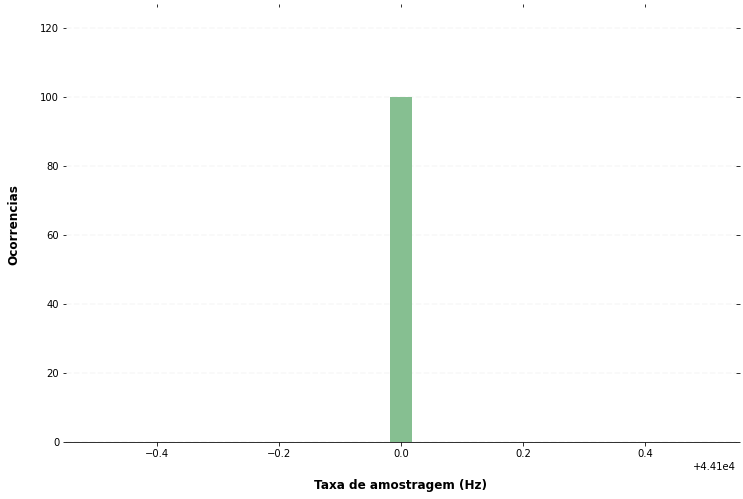

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

ax = df.hist(column='sr', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Taxa de amostragem (Hz)", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Ocorrencias", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))


*tentar reamostrar áudios para deixar tudo a 44,1kHz evitando assim a reamostragem e economizando tempo*

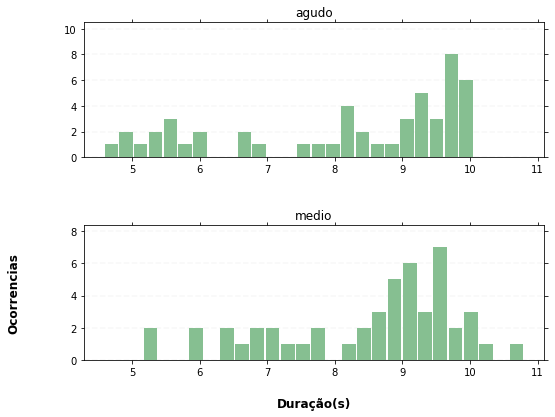

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

ax = df.hist(column='len', by='tipo', bins=25, grid=False, figsize=(8,10), layout=(3,1), sharex=True, color='#86bf91', zorder=2, rwidth=0.9)

for i,x in enumerate(ax):



    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

     # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Set x-axis label
    x.set_xlabel("Duração(s)", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    if i == 1:
        x.set_ylabel("Ocorrencias", labelpad=50, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

    x.tick_params(axis='x', rotation=0)

# Extrair descritores de cada arquivo

trajetoria diz o comportamento do som referente a um descritor



In [ ]:

def descritores(full_fname, texture_size=30):
  x, sr = librosa.load(full_fname, sr=44100, mono=True)#carrega som

  # Calcular descritores e janela de textura
  filt = np.hanning(texture_size)

  y0 = librosa.feature.chroma_stft(x)[0,:]
  y0_ = scipy.signal.oaconvolve(filt, y0)
#convolução para usar filtro passa-baixas

  y1 = librosa.feature.spectral_bandwidth(x)[0,:]
  y1_ = scipy.signal.oaconvolve(filt, y1)

  y2 = librosa.feature.rmse(x)[0,:]
  y2_ = scipy.signal.oaconvolve(filt, y2)

#calcular estatisticas
  return np.array([np.median(y0_), np.median(y1_), np.median(y2_)]) #mudar?
  #retira informações usando a média
  #outros: mediana, máximo, mínimo, desvio padrão
  #usar frequencia fundamental como feature (?)



In [ ]:
vect = descritores(full_fname)
print(vect)

[4.84777402e+00 2.12904419e+04 4.78419651e-01]


In [ ]:
# Checando se arquivos existem, numero de canais e taxa de amostragem
n_files = 0
vetores = []
canais = []
filenames = []
for index, row in df.iterrows():
  if (n_files % 10 == 0):
    print(str(n_files+1) + " " + full_fname)
  full_fname = diretorio + row['filename']
  vect = descritores(full_fname)
  filenames.append(full_fname)
  vetores.append(vect)
  n_files += 1
print("Processei esse número de arquivos: " + str(n_files))
vetores = np.array(vetores)
print(vetores.shape)

1 /content/drive/Shared drives/EG940/Sons/sons/zidedê.wav
11 /content/drive/Shared drives/EG940/Sons/sons/vite-vite-de-olho-cinza.wav
21 /content/drive/Shared drives/EG940/Sons/sons/jaó-do-sul.wav
31 /content/drive/Shared drives/EG940/Sons/sons/falcão-relógio.wav
41 /content/drive/Shared drives/EG940/Sons/sons/pica-pau-de-cabeça-amarela.wav
51 /content/drive/Shared drives/EG940/Sons/sons/acauã.wav
61 /content/drive/Shared drives/EG940/Sons/sons/coró-coró.wav
71 /content/drive/Shared drives/EG940/Sons/sons/garibaldi.wav
81 /content/drive/Shared drives/EG940/Sons/sons/joão-de-barro.wav
91 /content/drive/Shared drives/EG940/Sons/sons/saci.wav
Processei esse número de arquivos: 100
(100, 3)


# Pré-processamento e visualização dos dados

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


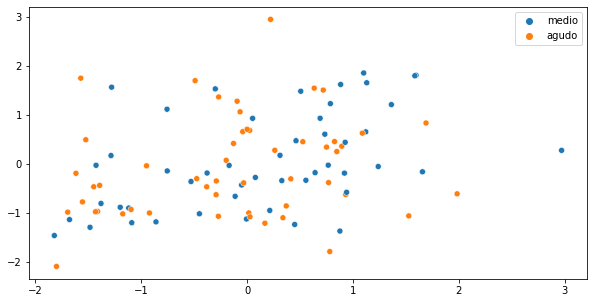

In [ ]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
#normaliza tendo média zero e desvio padrao igual a 1

scaler = StandardScaler()
scaler.fit(vetores)#ajusta os 'vetores'
dados = scaler.transform(vetores)



plt.figure(figsize=(10,5))
#spectral centroid e flatness
sns.scatterplot(dados[:,0], dados[:,1], hue=classe)
#               media norm.|media do flatness normalizada
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


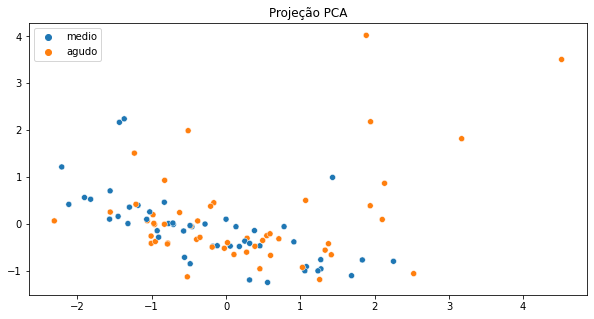

In [ ]:
from sklearn.decomposition import PCA
#transf. linear que projete 3 dimensoes em duas que volta com uma operaçao quase inversa --> 2 dimensoes que melhor descrevem as 3 dimensoes (menor erro)
projection = PCA(2)
dados_ = projection.fit_transform(dados)
#projeçao 2D que minimize o erro da volta

plt.figure(figsize=(10,5))
plt.title('Projeção PCA')

sns.scatterplot(dados_[:,0], dados_[:,1], hue=classe)
plt.show()
#LINEAR

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


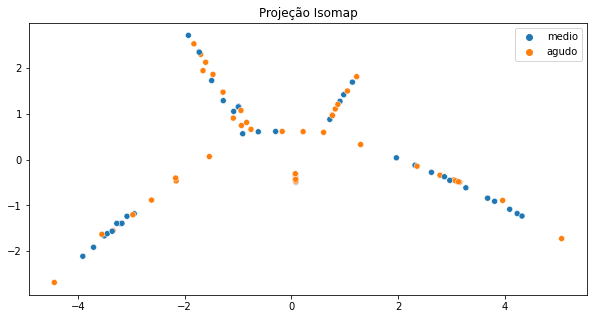

In [ ]:
from sklearn.manifold import Isomap

projection = Isomap(2)
dados_ = projection.fit_transform(dados)

plt.figure(figsize=(10,5))
plt.title('Projeção Isomap')

sns.scatterplot(dados_[:,0], dados_[:,1], hue=classe)
plt.show()
#PRESERVA DISTANCIAS PROXIMAS -- NÃO LINEAR

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


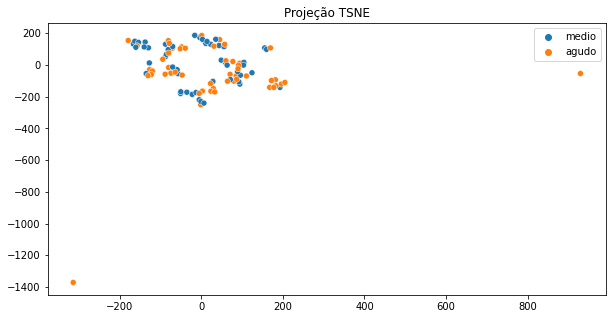

In [ ]:
from sklearn.manifold import TSNE

projection = TSNE(2, perplexity=5)
dados_ = projection.fit_transform(dados)
'''
A perplexidade está relacionada ao número de vizinhos mais próximos que é usado em outros algoritmos de aprendizagem múltiplos
'''

plt.figure(figsize=(10,5))
plt.title('Projeção TSNE')

sns.scatterplot(dados_[:,0], dados_[:,1], hue=classe)
#plt.xlim(-500,500)
plt.show()
#ENCONTRA CLUSTERS (GRUPOS)

# Aplicação: query-by-content

fornece um áudio pro sistema e retorna o áudio mais similar



#Verificação

In [ ]:
numero_do_query = 29  #@param {type: "slider", min: 0, max: 50}
#query_fname = filenames[numero_do_query]
query_fname = '/content/drive/Shareddrives/EG940/Sons/classificar_som/coró-coró_teste.wav'
#print("Abrindo arquivo: ", filenames[numero_do_query])
y, sr = librosa.load(query_fname)
Audio(y, rate=sr)


In [ ]:
query_vetor = descritores(query_fname).reshape(1, -1)
#procura na base de dados quem está mais próximo dele
query_vetor_ = scaler.transform(query_vetor) # scaler ja esta ajustado na base de dados!
distancias = np.zeros(dados.shape[0])
for i in np.arange(dados.shape[0]):
  if i==numero_do_query:
    distancias[i]=10**6 # Isso evita que eu retorne exatamente o sample usado como query
  else:
    distancias[i] = np.sum( (query_vetor_ - dados[i,:])**2 )#distancia euclidiana é uma boa representaçao de distancia perceptual 
mindist = np.argmin(distancias)

print(mindist)
print(filenames[mindist])
y, sr = librosa.load(filenames[mindist])
Audio(y, rate=sr)

#funciona: descritores proximos = sonoridade proxima
#não funciona: assume-se que os descritores estao descrevendo todos os apectos sonoros

16
/content/drive/Shared drives/EG940/Sons/sons/quero-quero.wav


# Aplicação: classificador automático


KNN: pontos mais próximos

fit e predict --> dividir o data set em dois subconjuntos : treino e teste





In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(dados, classe, test_size=0.25, random_state=29)
classifier = KNeighborsClassifier(n_neighbors=3) #qtos vizinhos quero avaliar
#classifier = SVC(C=10)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)#entradas do conj de teste
print(classification_report(y_test, y_pred))# o que sei a resposta e o que o classificador prediz

              precision    recall  f1-score   support

       agudo       0.64      0.69      0.67        13
       medio       0.64      0.58      0.61        12

    accuracy                           0.64        25
   macro avg       0.64      0.64      0.64        25
weighted avg       0.64      0.64      0.64        25



In [ ]:
vetor = []
vect = descritores('/content/drive/Shareddrives/EG940/Sons/classificar_som/coró-coró_teste.wav')
vetor.append(vect)
vetor = np.array(vetor)
scaler = StandardScaler()
scaler.fit(vetor)#ajusta os 'vetores'
dados = scaler.transform(vetor)

y_pred = classifier.predict(vetor)#entradas do conj de teste
print(y_pred)
#print(classification_report(y_test, y_pred))# o que sei a resposta e o que o classificador prediz


['medio']


# PCA

Análise de componentes principais (PCA) é uma técnica de redução de dimensionalidade não supervisionada bem conhecida que constrói recursos / variáveis relevantes por meio de combinações lineares (PCA linear) ou não lineares (PCA kernel) das variáveis ​​originais (recursos). Neste post, vamos nos concentrar apenas no famoso e amplamente utilizado método linear PCA .

A construção de características relevantes é alcançada pela transformação linear de variáveis ​​correlacionadas em um número menor de variáveis não correlacionadas . Isso é feito projetando (produto escalar) os dados originais no espaço reduzido do PCA usando os autovetores da matriz de covariância / correlação, também conhecidos como componentes principais (PCs).

### Quando / por que usar o PCA
Técnica PCA é particularmente útil no processamento de dados, onde múltiplos - colinearidade existe entre as características / variáveis .
O PCA pode ser usado quando as dimensões dos recursos de entrada são altas (por exemplo, muitas variáveis).
O PCA também pode ser usado para redução de ruído e compactação de dados .

Separa dados correlacionados em grupos. Caso estejam todos juntos ou bem misturados, significa que possui algumas características reveladas pelo PCA semelhantes.

O PCA se mostra uma feature ideal quando há a uma separação quase perfeita dos dados em grupos bem definidos.

# TSNE


O principal objetivo do t-SNE é projetar pontos multidimensionais em gráficos bidimensionais ou tridimensionais de forma que, se dois pontos estivessem próximos no espaço de alta dimensão inicial, eles ficariam próximos na projeção resultante. Se os pontos estivessem longe um do outro, eles também deveriam ficar longe no espaço de baixa dimensão alvo.

Para fazer isso, t-SNE primeiro cria uma distribuição de probabilidade que captura essas relações mútuas de distância entre os pontos no espaço de alta dimensão inicial. Depois disso, o algoritmo tenta criar um espaço de baixa dimensão que tenha relações semelhantes entre os pontos.

Quando as amostras das mesmas classes formam clusters claramente visíveis significa que a rede realmente entende os dados e suas classes e é capaz de distingui-los.

A proximidade entre clusters também podem indicar que os recursos representam relações semânticas entre os objetos na vida real. 

# PCA vs T-SNE
O t-SNE é caro do ponto de vista computacional e pode levar várias horas em conjuntos de dados de milhões de amostras em que o PCA terminará em segundos ou minutos.

PCA é uma técnica matemática, mas t-SNE é probabilística.
Algoritmos de redução de dimensionalidade linear, como PCA, concentram-se em colocar pontos de dados diferentes distantes em uma representação de dimensão inferior. Porém, para representar dados de alta dimensão em variedades não lineares de baixa dimensão, é essencial que pontos de dados semelhantes sejam representados próximos uns dos outros, o que é algo que t-SNE não PCA.

Às vezes, em t-SNE, execuções diferentes com os mesmos hiperparâmetros podem produzir resultados diferentes, portanto, vários gráficos devem ser observados antes de fazer qualquer avaliação com t-SNE, enquanto este não é o caso com PCA.

Uma vez que o PCA é um algoritmo linear, ele não será capaz de interpretar a relação polinomial complexa entre as características enquanto t-SNE é feito para capturar exatamente isso.

# Isomap

Isomap significa mapeamento isométrico. Isomap é um método de redução de dimensionalidade não linear baseado na teoria espectral que tenta preservar as distâncias geodésicas na dimensão inferior. O Isomap começa criando uma rede de vizinhança. Depois disso, ele usa a distância do gráfico para a *distância geodésica aproximada* entre todos os pares de pontos. E então, por meio da decomposição de valores próprios da matriz de distância geodésica, ele encontra a incorporação de baixa dimensão do conjunto de dados. Em variedades não lineares, a métrica Euclidiana para distância é válida se e somente se a estrutura de vizinhança pode ser aproximada como linear. Se a vizinhança contém buracos, as distâncias euclidianas podem ser altamente enganosas. Em contraste com isso, se medirmos a distância entre dois pontos seguindo a variedade, teremos uma melhor aproximação de quão longe ou perto dois pontos estão. 


 Isomap funciona nas seguintes etapas:
*   Ele determina pontos vizinhos com base na distância múltipla e conecta os pontos dentro de um raio fixo.
*   Ele calcula a distância geodésica entre os pontos que foram determinados na etapa anterior.
*   Finalmente, o Multi Dimensional Scaling é aplicado no gráfico de distância e a geometria é preservada, as posições dos pontos são otimizadas.


# precision
é a proporção de observações positivas preditas corretamente em relação ao total de observações positivas preditas. A alta precisão está relacionada à baixa taxa de falsos positivos. (Ter uma precisão de 0,788 é muito bom.)

Imediatamente, você pode ver que o Precision fala sobre quão preciso é seu modelo em relação aos positivos previstos, quantos deles são realmente positivos.

# recall
é a proporção de observações positivas preditas corretamente para todas as observações na aula real - sim. A pergunta que o recall responde é: De todos os passageiros que realmente sobreviveram, quantos rotulamos? Por exemplo, temos o recall de 0,631, que é bom para este modelo, pois está acima de 0,5.

# f1-score
é a média ponderada de precisio e recall. Portanto, essa pontuação leva em consideração os falsos posintivos e os falsos negativos. Intuitivamente, não é tão fácil de entender quanto a precision, mas F1 geralmente é mais útil do que a precision, especialmente se você tiver uma distribuição de classes desigual. A precision funciona melhor se falsos positivos e falsos negativos tiverem custos semelhantes. Se o custo de falsos positivos e falsos negativos forem muito diferentes, é melhor olhar para precision e recall. Em nosso caso, a pontuação de F1 é 0,701.

# suport
O suporte pode ser definido como o número de amostras da resposta verdadeira que está em cada classe de valores alvo.

# accuracy
 é a medida de desempenho mais intuitiva e é simplesmente uma relação entre a observação prevista corretamente e o total de observações. Pode-se pensar que, se tivermos alta precisão, nosso modelo é o melhor. Sim, a precisão é uma ótima medida, mas apenas quando você tem conjuntos de dados simétricos onde os valores de falso positivo e falso negativo são quase os mesmos. Portanto, você deve olhar para outros parâmetros para avaliar o desempenho do seu modelo. 

# macro avg
O método é direto. Basta obter a média da precisão e recuperação do sistema em conjuntos diferentes. 
O método da macro-média de adequação pode ser usado quando você deseja saber como o sistema se comporta de maneira geral nos conjuntos de dados. Você não deve tomar nenhuma decisão específica com essa média. Use a pontuação da macro média quando todas as classes precisarem ser tratadas igualmente para avaliar o desempenho geral do classificador em relação aos rótulos de classe mais frequentes.

A pontuação macro F1 (abreviação de pontuação F1 com média macro) é usada para avaliar a qualidade dos problemas com vários rótulos binários ou várias classes.

Se você está procurando um modelo baseado em um equilíbrio entre precisão e recall, não perca a avaliação de suas pontuações F1!

Macro F1-score = 1 é o melhor valor e o pior valor é 0.

Todas as classes tratadas igualmente
A pontuação macro F1 dará a mesma importância a cada rótulo / classe. Será baixo para modelos que têm um bom desempenho apenas nas classes comuns, enquanto têm um desempenho fraco nas classes raras.

A macro-média é usada para modelos com várias classes / rótulos, por exemplo, em nosso tutorial de Guarda-roupa com classificação automática. Ao calcular a média da macro, todas as classes contribuem igualmente, independentemente da frequência com que aparecem no conjunto de dados.


A média F1 da macro é realizada calculando primeiro a pontuação F1 por classe / rótulo e, em seguida, fazendo a média deles.


A média de macro é o método de agregação padrão para pontuação F1 para problemas de várias classes de rótulo único.





# weighted avg

Caso os rótulos apresentem pesos diferentes

Isso pressupõe que todos os rótulos são igualmente importantes, no entanto,  pode não ser o caso. Em particular, por exemplo, se você tiver muito mais fotos de Alice do que de Bob ou Charlie, você pode querer dar mais peso ao classificador pontuação em fotos de Alice. Uma opção simples é dar a cada etiqueta um peso igual ao seu suporte (ou seja, o número de instâncias com esse rótulo de destino). Para faça isso, simplesmente defina average="weighted" no código anterior.




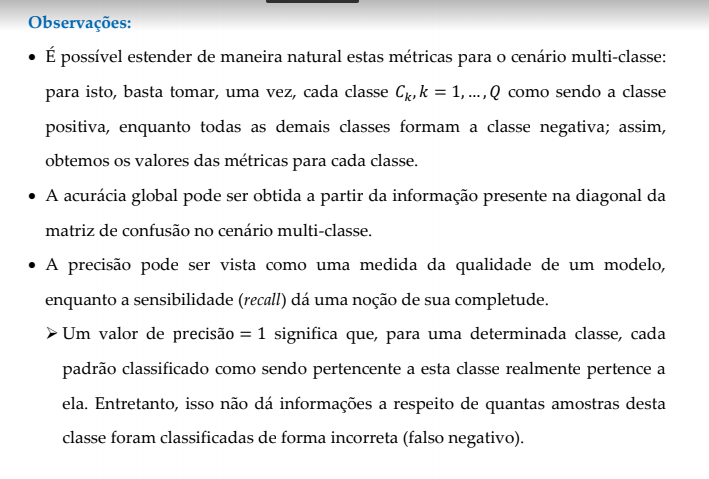

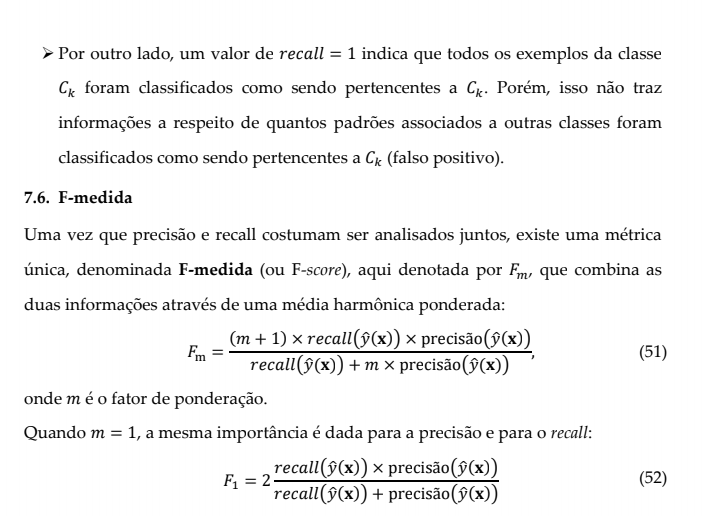

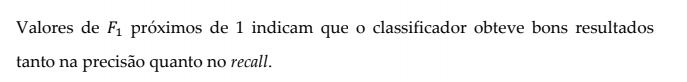

#Resultados

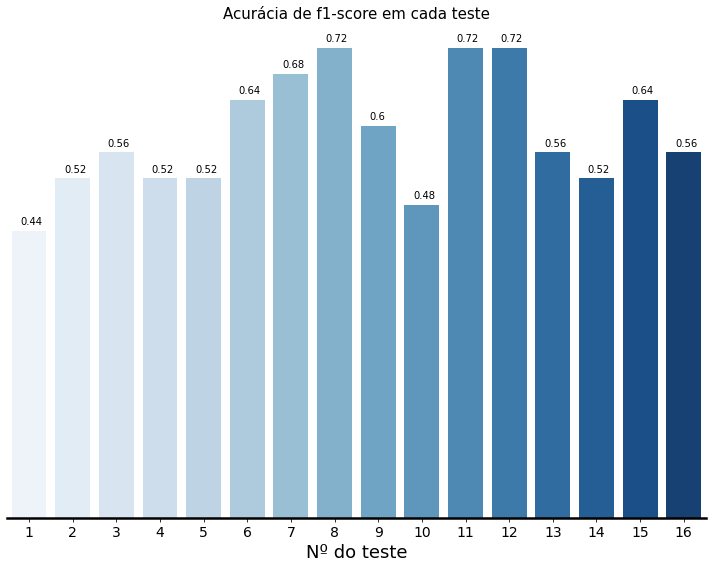

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

x0=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
y0=[0.44,0.52,0.56,0.52,0.52,0.64,0.68,0.72,0.6,0.48,0.72,0.72,0.56,0.52,0.64,0.56,]
altura = []
for i in y0:
   altura.append(i)
   posicao = []
for i in range(0,len(x0),1): 
   posicao.append(i)
#criando uma figure, axes, alterando tamanho
fig, ax = plt.subplots(figsize=(10,8))#criando o gráfico de barras
sns.barplot(x=x0, y=y0, ax=ax,  palette='Blues')#adicionando título
ax.set_title("Acurácia de f1-score em cada teste", fontdict={'fontsize':15})#mudando e nome e tamanho do label x
ax.set_xlabel('Nº do teste', fontdict={'fontsize':18})#mudando tamanho do label eixo y
ax.set_ylabel('')#mudando tamanho dos labels dos ticks
ax.tick_params(labelsize=14)#aumentando espessura linha inferior
ax.spines['bottom'].set_linewidth(2.5)#remoção dos outros três axis
for axis in ['top', 'right', 'left']:
   ax.spines[axis].set_color(None)#remoção dos ticks
ax.tick_params(axis='y', labelleft=False, left=None)                  #Colocando a quantidade em cada barra
for i in range(len(x0)):
   ax.text(x=posicao[i]-0.2, y=altura[i]+0.01, s=str(altura[i]),   
           fontsize=10)#otimizar espaço da figure
fig.tight_layout();

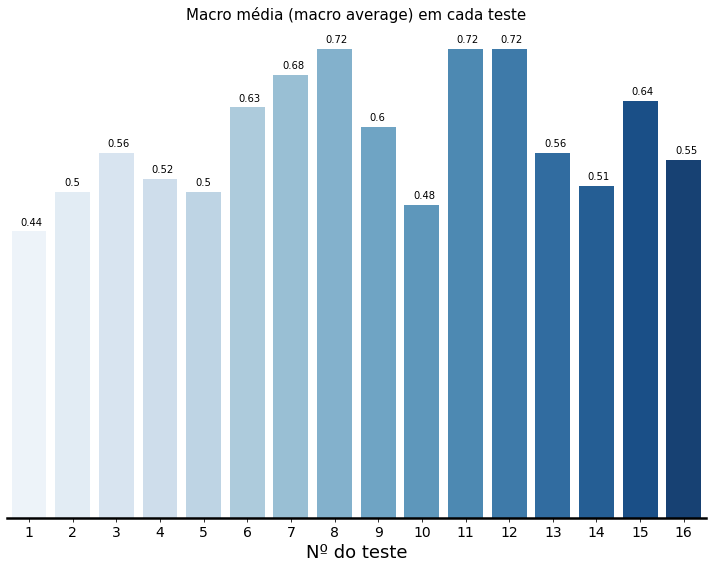

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

x0=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
y1=[0.44,0.50,0.56,0.52,0.5,0.63,0.68,0.72,0.6,0.48,0.72,0.72,0.56,0.51,0.64,0.55]
altura = []
for i in y1:
   altura.append(i)
   posicao = []
for i in range(0,len(x0),1): 
   posicao.append(i)
#criando uma figure, axes, alterando tamanho
fig, ax = plt.subplots(figsize=(10,8))#criando o gráfico de barras
sns.barplot(x=x0, y=y1, ax=ax,  palette='Blues')#adicionando título
ax.set_title("Macro média (macro average) em cada teste", fontdict={'fontsize':15})#mudando e nome e tamanho do label x
ax.set_xlabel('Nº do teste', fontdict={'fontsize':18})#mudando tamanho do label eixo y
ax.set_ylabel('')#mudando tamanho dos labels dos ticks
ax.tick_params(labelsize=14)#aumentando espessura linha inferior
ax.spines['bottom'].set_linewidth(2.5)#remoção dos outros três axis
for axis in ['top', 'right', 'left']:
   ax.spines[axis].set_color(None)#remoção dos ticks
ax.tick_params(axis='y', labelleft=False, left=None)                  #Colocando a quantidade em cada barra
for i in range(len(x0)):
   ax.text(x=posicao[i]-0.2, y=altura[i]+0.01, s=str(altura[i]),   
           fontsize=10)#otimizar espaço da figure
fig.tight_layout();